<a href="https://colab.research.google.com/github/somasekharmannepalli/employeeattritionprediction/blob/main/employeeattritionprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📦 Import necessary libraries




In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


#Load and Explore Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_data(path):
    df = pd.read_csv("Employee.csv")
    return df

def visualize_class_distribution(df, target_column):
    counts = df[target_column].value_counts()
    plt.figure(figsize=(5, 5))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
    plt.title('Target Variable Distribution')
    plt.show()

def plot_correlation(df):
    plt.figure(figsize=(12, 8))
    corr = df.corr()
    sns.heatmap(corr, annot=False, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()


#preprocessing

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

def encode_features(df, target_column):
    df = df.copy()
    label_enc = LabelEncoder()
    for col in df.select_dtypes(include=['object']).columns:
        if col != target_column:
            df[col] = label_enc.fit_transform(df[col])
    df[target_column] = label_enc.fit_transform(df[target_column])
    return df

def scale_features(df, target_column):
    scaler = StandardScaler()
    features = df.drop(target_column, axis=1)
    target = df[target_column]
    X = scaler.fit_transform(features)
    y = target
    return X, y


#model training and evaluation

In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def train_model(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    print(f"\033[1mModel Accuracy:\033[0m {acc:.4f}\n")

    print("Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix Heatmap")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model, X_train, X_test, y_train, y_test


#feature importance

In [5]:
def plot_feature_importance(model, feature_names):
    importances = pd.Series(model.feature_importances_, index=feature_names)
    plt.figure(figsize=(10, 6))
    importances.nlargest(10).sort_values().plot(kind='barh', color='teal')
    plt.title('Top 10 Feature Importances')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.show()


#main

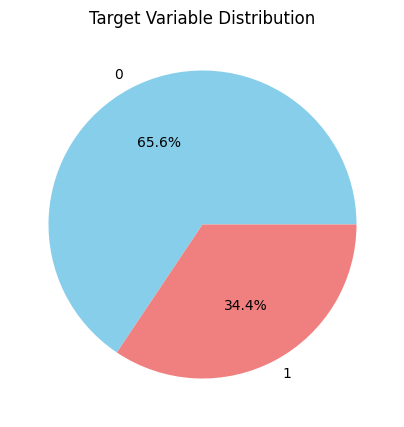

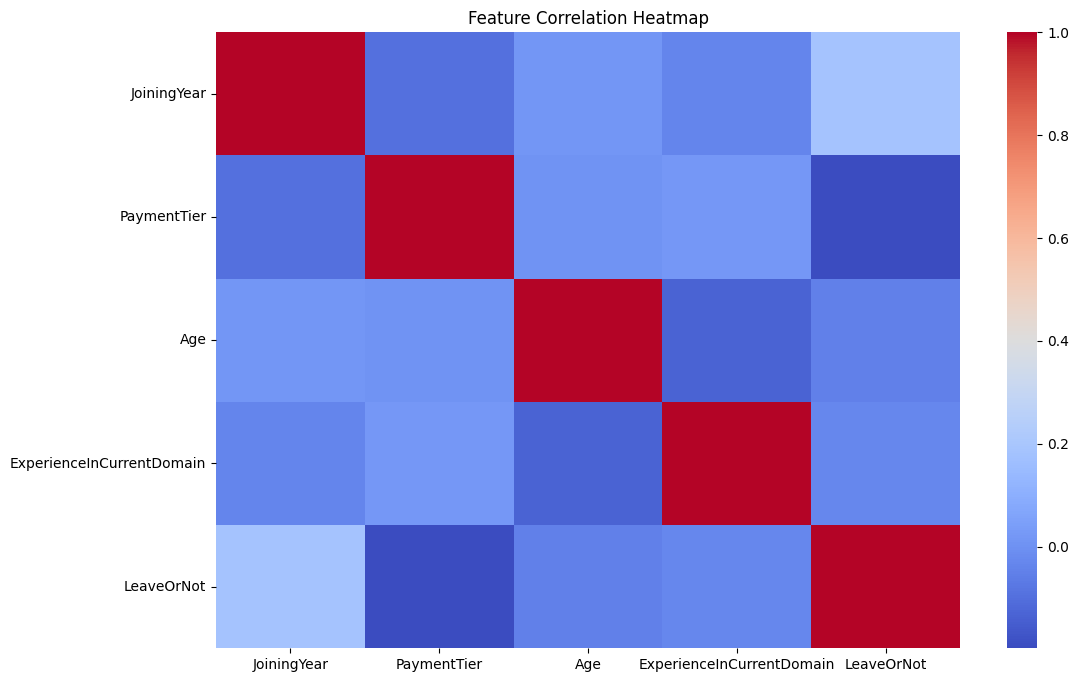

Model Accuracy: 0.8496

Confusion Matrix:


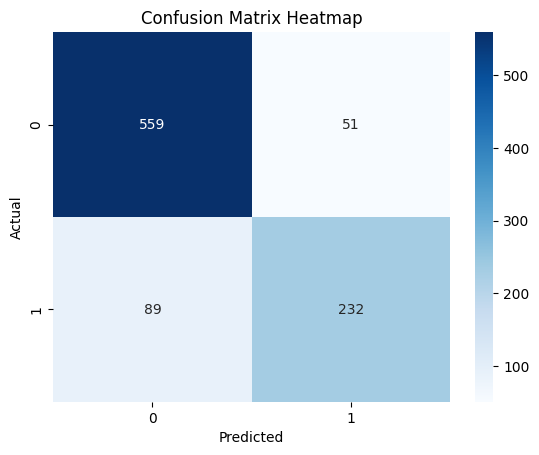


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       610
           1       0.82      0.72      0.77       321

    accuracy                           0.85       931
   macro avg       0.84      0.82      0.83       931
weighted avg       0.85      0.85      0.85       931



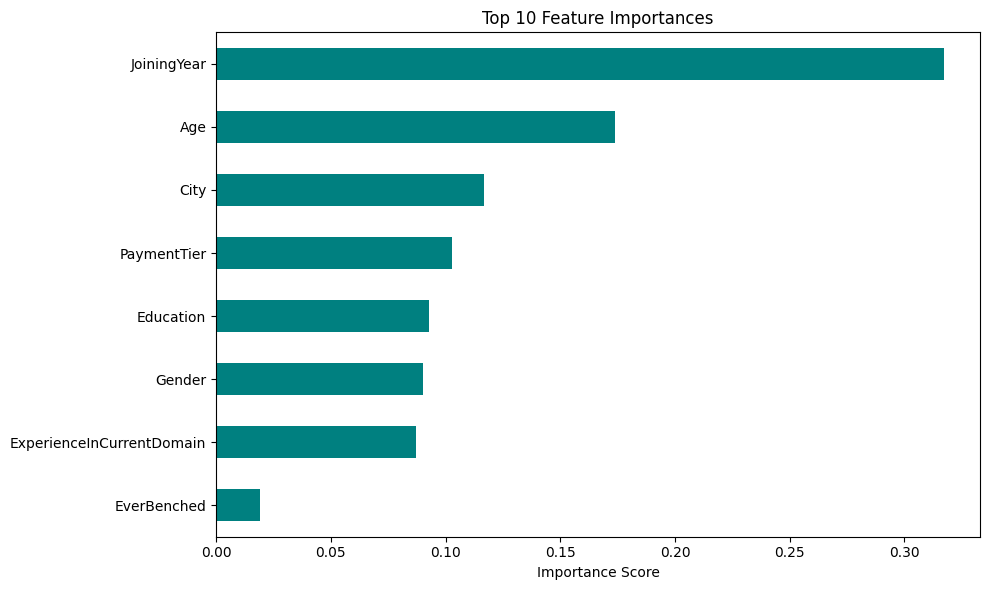

In [6]:
# Step 1: Load data
df = load_data("Employee.csv")

# Step 2: Visualize
visualize_class_distribution(df, 'LeaveOrNot')
plot_correlation(df.select_dtypes(include=['int64', 'float64']))

# Step 3: Preprocess
df = encode_features(df, 'LeaveOrNot')
X, y = scale_features(df, 'LeaveOrNot')

# Step 4: Train and evaluate
model, X_train, X_test, y_train, y_test = train_model(X, y)

# Step 5: Feature importance
plot_feature_importance(model, df.drop('LeaveOrNot', axis=1).columns)
